In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
dataset.shape

(23486, 11)

In [5]:
dataset.dropna(axis = 0, subset = ["Division Name", "Department Name","Class Name"], inplace = True)


In [6]:
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [7]:
dataset.shape

(23472, 11)

In [8]:
dataset[dataset["Review Text"].isna()].head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear


In [9]:
dataset.loc[(dataset["Review Text"].isna()) & (dataset["Rating"] >= 4),'Review Text'] = "Good"
dataset.loc[(dataset["Review Text"].isna()) & (dataset["Rating"] == 3),'Review Text'] = "Neutral"
dataset.loc[(dataset["Review Text"].isna()) & (dataset["Rating"] <= 2),'Review Text'] = "Bad"

In [10]:
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3809
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [11]:
dataset.loc[(dataset["Rating"] >= 4),'Sentiment Category'] = "Good"
dataset.loc[(dataset["Rating"] == 3),'Sentiment Category'] = "Neutral"
dataset.loc[(dataset["Rating"] <= 2),'Sentiment Category'] = "Bad"
dataset

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Category
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Bad
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Good
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,Good
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Good
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,Good


## Visualization (Data Exploration)

Text(0.5,1,'sentiment Distribution')

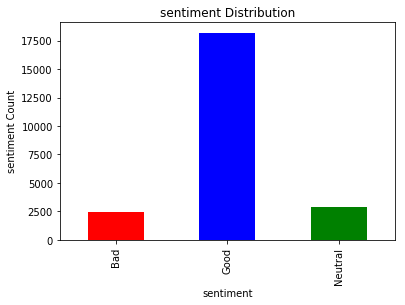

In [12]:
sentiment_freq = dataset.groupby(['Sentiment Category']).size()
sentiment_freq.plot.bar(color=['r','b','g'])
plt.xlabel('sentiment')
plt.ylabel('sentiment Count')
plt.title('sentiment Distribution')

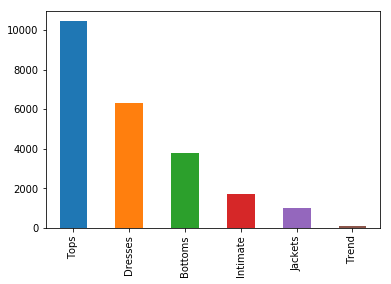

In [13]:
cloth_categ_freq = dataset['Department Name'].value_counts()
cloth_categ_freq.plot.bar()


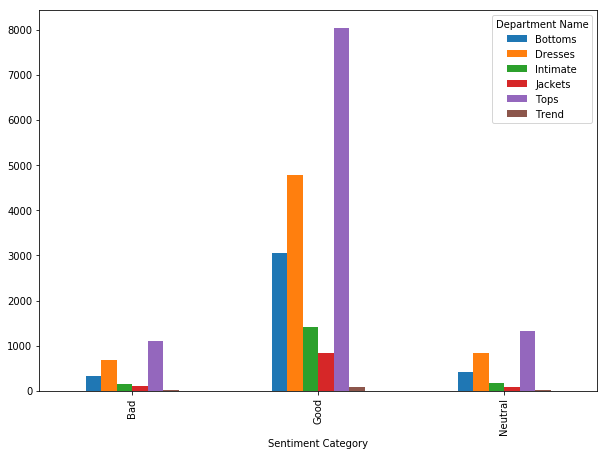

In [14]:
cloth_categ_freq = dataset.groupby(['Sentiment Category','Department Name']).size()
cloth_categ_freq.unstack().plot.bar(figsize= (10,7))



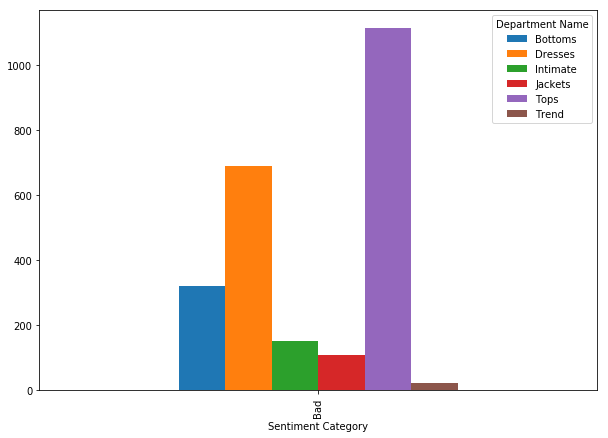

In [15]:
cloth_categ_freq = dataset[dataset['Sentiment Category'] == 'Bad'].groupby(['Sentiment Category','Department Name']).size()
cloth_categ_freq.unstack().plot.bar(figsize= (10,7))

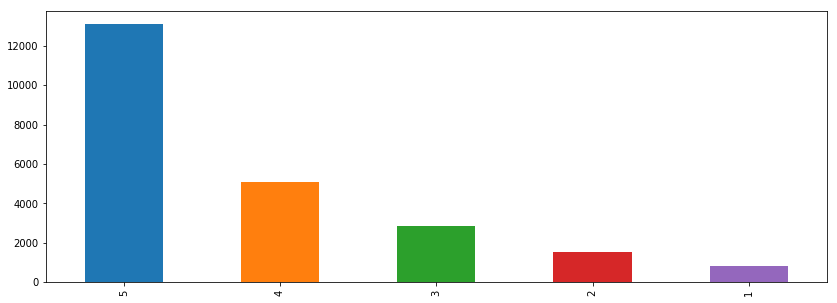

In [16]:
rating_freq = dataset['Rating'].value_counts()
rating_freq.plot.bar(figsize= (14,5))


## Now distribution with count 

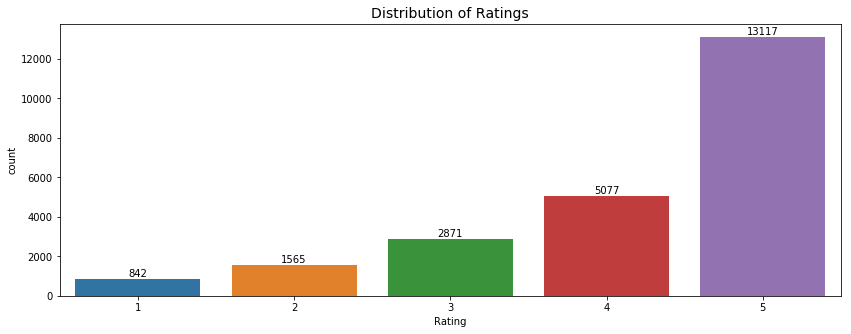

In [17]:
import seaborn as sns
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Rating', data=dataset)
ax.set_title("Distribution of Ratings", fontsize=14)

x=dataset['Rating'].value_counts(sort = False)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

In [18]:
dataset['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
1022     205
836      205
        ... 
56         1
1191       1
1175       1
1143       1
1127       1
1183       1
887        1
791        1
568        1
600        1
648        1
680        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
712        1
0          1
Name: Clothing ID, Length: 1199, dtype: int64

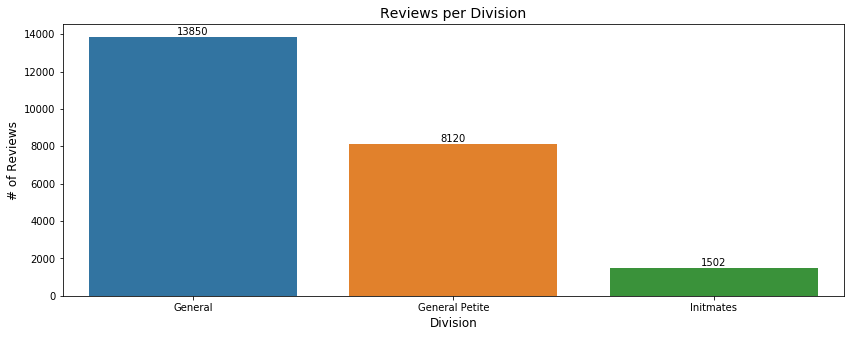

In [19]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Division Name', data=dataset, order = dataset['Division Name'].value_counts().index)
ax.set_title("Reviews per Division", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Division", fontsize=12)

x=dataset['Division Name'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

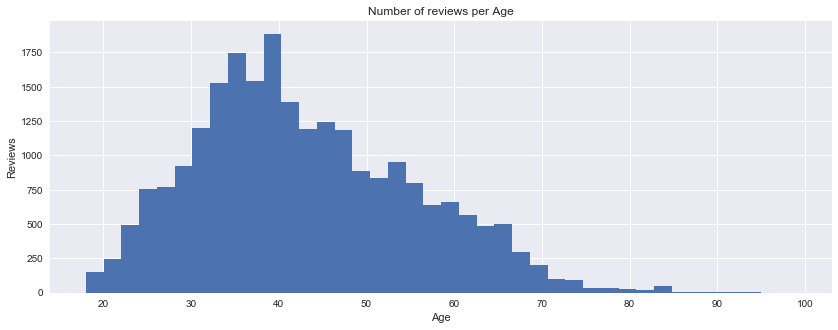

In [20]:
sns.set(rc={'figure.figsize':(14,5)})
plt.hist(dataset.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

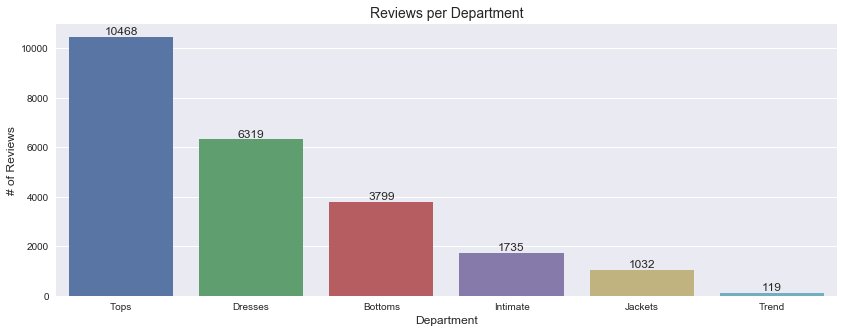

In [21]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Department Name', data=dataset, order = dataset['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)

x=dataset['Department Name'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

In [22]:
dataset['Length Review'] = dataset['Review Text'].apply(len)
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Category,Length Review
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,192


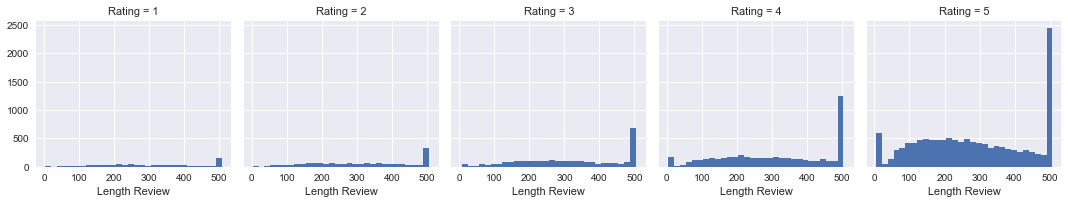

In [23]:
grid_data = sns.FacetGrid(dataset, col='Rating')
grid_data.map(plt.hist,'Length Review',bins=30)

### length of review text increases as rating increases.

In [24]:
import re
def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) #replacing all except alphabet with space
    words = letters_only.lower().split()            #splitting string into list                 
    return( " ".join( words ))                      #joining all words back again forming one text

In [25]:
!pip install wordcloud

smart-open 1.7.1 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)|{'skirt','one','look','looked','looks','blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse'}

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)    # make one string by joining all string
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.imshow(cloud, interpolation='bilinear')
    plt.show()

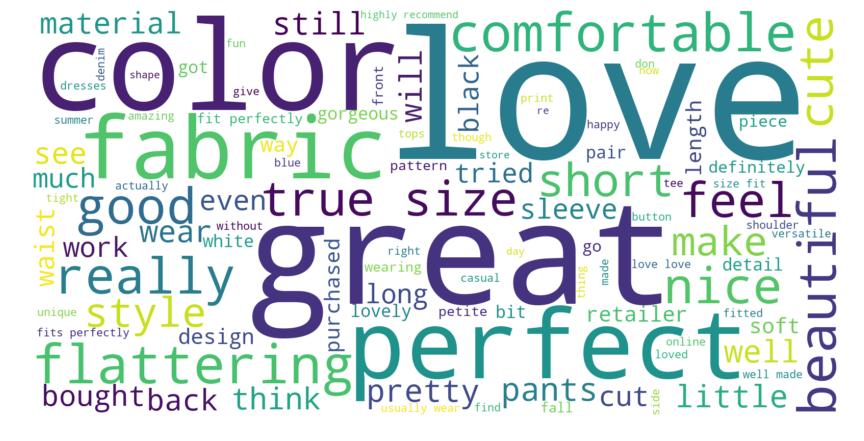

In [27]:
rating5= dataset[dataset['Rating']==5]['Review Text'].apply(clean_data)
create_cloud(rating5)


### Top Words in Rating = 5
* love
* color
* great
* comfortable
* look
* one
* perfect

Words to consider when designing women's clothing: comfortable, soft, beautiful, well made, detail, design, versatile

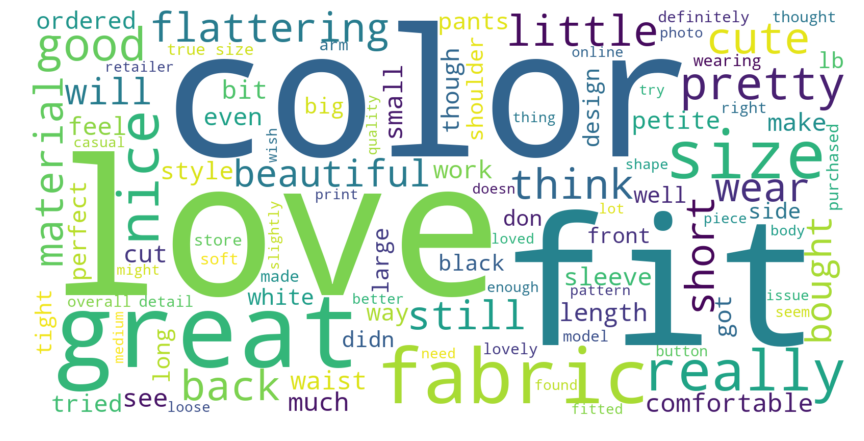

In [28]:
rating4= dataset[dataset['Rating']==4]['Review Text'].apply(clean_data)
create_cloud(rating4)

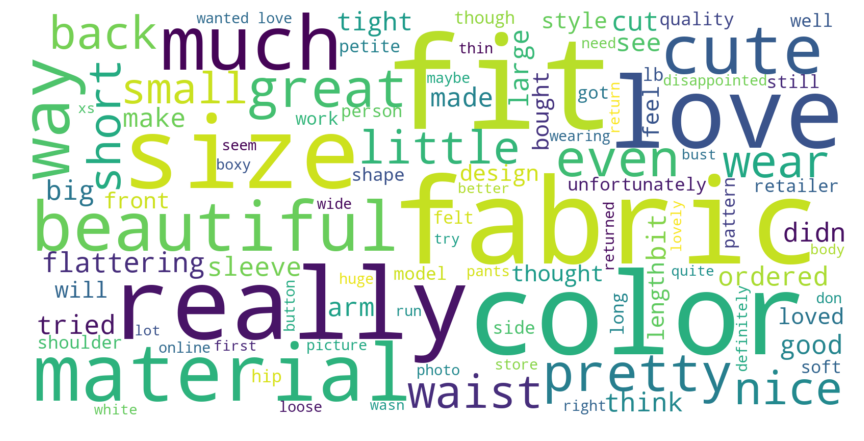

In [29]:
rating3= dataset[dataset['Rating']==3]['Review Text'].apply(clean_data)
create_cloud(rating3)

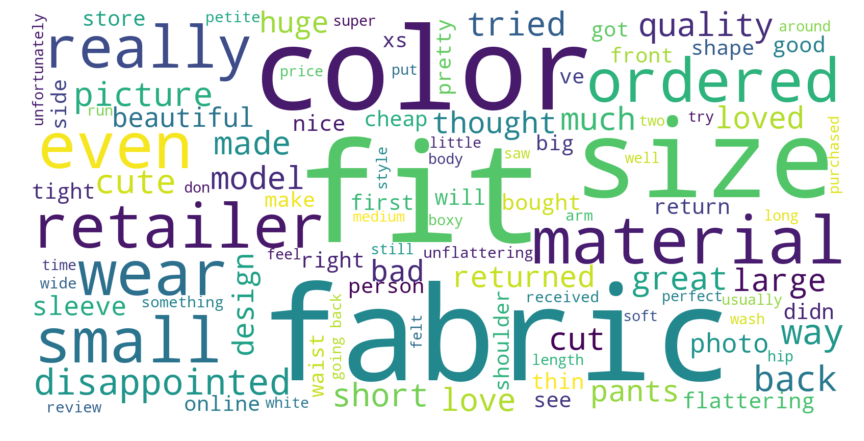

In [30]:
rating1= dataset[dataset['Rating']==1]['Review Text'].apply(clean_data)
create_cloud(rating1)

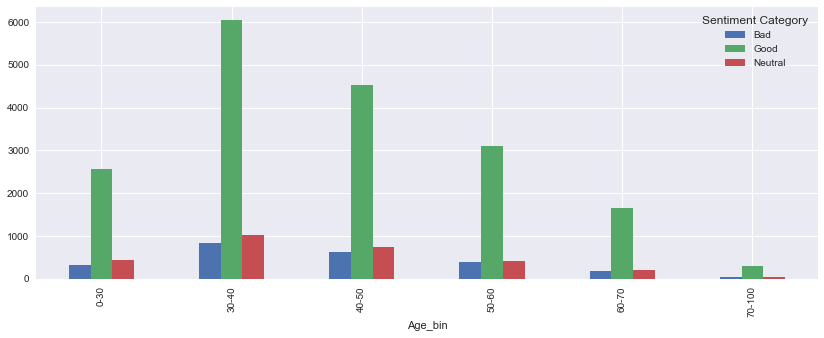

In [31]:
#Age_bin = pd.cut(dataset['Age'], [0,30,50,60,70,100], labels=['0-30','30-50','50-60','60-70','70-100'])
Age_bin = pd.cut(dataset['Age'], [0,30,40,50,60,70,100], labels=['0-30','30-40','40-50','50-60','60-70','70-100'])
dataset['Age_bin'] = Age_bin
age_bins_grp = dataset.groupby(['Sentiment Category', 'Age_bin']).size()
age_bins_grp
age_bins_grp = age_bins_grp.unstack(0)
age_bins_grp.plot.bar()

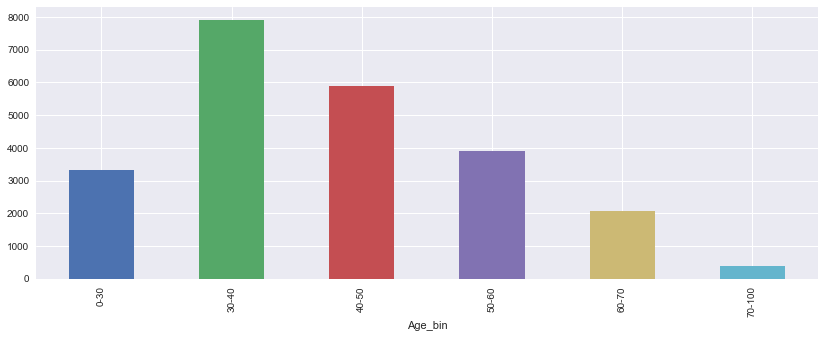

In [32]:
dataset.groupby('Age_bin').size().plot.bar()

#  * Modeling 

In [33]:
dataset['Sentiment_numeric'] = dataset['Sentiment Category'].apply(lambda x : 0 if x == 'Bad' else 1 if x == 'Neutral' else 2)
dataset.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Category,Length Review,Age_bin,Sentiment_numeric
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,53,30-40,2
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,303,30-40,2
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral,500,50-60,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,124,40-50,2
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,192,40-50,2
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Bad,488,40-50,0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Good,496,30-40,2
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,Good,482,30-40,2
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Good,166,0-30,2
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,Good,360,30-40,2


In [34]:


from sklearn.cross_validation import train_test_split
train,test = train_test_split(dataset, test_size = 0.3, random_state = 0)


C:\Users\nktmadan1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
train_review = train['Review Text']
train_senti = train['Sentiment_numeric']
test_review = test['Review Text']
test_senti = test['Sentiment_numeric']

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
tfidf = vectorizer.fit_transform(train_review)
tfidf.shape

(16430, 3916)

In [37]:
tfidf_test = vectorizer.transform(test_review)
tfidf_test.shape

(7042, 3916)

In [38]:
TfidfVectorizer?

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [40]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    MultinomialNB()]

In [41]:
dense_train_review=tfidf.toarray()
dense_test_review= tfidf_test.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
        if(classifier.__class__.__name__ == 'GaussianNB'):
            fit = classifier.fit(dense_train_review,train_senti)
            pred = fit.predict(dense_test_review)
        else:
            fit = classifier.fit(tfidf,train_senti)
            pred = fit.predict(tfidf_test)   
        accuracy = accuracy_score(pred,test_senti)
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))   

Accuracy of LogisticRegression is 0.7790400454416359
Accuracy of KNeighborsClassifier is 0.7732178358420904
Accuracy of SVC is 0.7790400454416359
Accuracy of DecisionTreeClassifier is 0.7283442203919341
Accuracy of RandomForestClassifier is 0.8024708889520022
Accuracy of AdaBoostClassifier is 0.8027548991763703
Accuracy of MultinomialNB is 0.7963646691280886


## Testing Best model performance. created new file with new reviews 

In [42]:
dataset_test = pd.read_excel("test_review.xlsx")

In [43]:
dataset_test.head()

,Review,Rating,Sentiment
0,Got this dress for our youth choir girls to ma...,5,Good
1,"This dress is beautiful! I am 5' 3"" and 170lbs...",4,Good
2,Returned....smaller than expected poor quality...,1,Bad
3,"I don't even know how to explain this, the pro...",1,Bad
4,"this blouse fits okay, but the sowing is very ...",3,Neural


In [44]:
dataset_test['Sentiment_numeric'] = dataset_test['Sentiment'].apply(lambda x : 0 if x == 'Bad' else 1 if x == 'Neural' else 2)
dataset_test

,Review,Rating,Sentiment,Sentiment_numeric
0,Got this dress for our youth choir girls to ma...,5,Good,2
1,"This dress is beautiful! I am 5' 3"" and 170lbs...",4,Good,2
2,Returned....smaller than expected poor quality...,1,Bad,0
3,"I don't even know how to explain this, the pro...",1,Bad,0
4,"this blouse fits okay, but the sowing is very ...",3,Neural,1
5,"This top was not made for a woman, it would be...",1,Bad,0
6,Terrible quality. The shirt is cheaply made an...,1,Bad,0


### testing performance using AdaBoostClassifier model

In [45]:
tfidf_test_1 = vectorizer.transform(dataset_test['Review'])

In [55]:
ada_model = AdaBoostClassifier()
ada_model.fit(tfidf,train_senti )
pred = ada_model.predict(tfidf_test_1)
pred
accuracy = accuracy_score(pred,dataset_test['Sentiment_numeric'])
accuracy

0.42857142857142855

### testing performance using MultinomialNB model

In [56]:
dense_test_review= tfidf_test_1.toarray()
dense_train_review=tfidf.toarray()
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB ()
model.fit(dense_train_review,train_senti)
pred = model.predict(dense_test_review)

In [57]:
pred
accuracy = accuracy_score(pred,dataset_test['Sentiment_numeric'])
accuracy

0.7142857142857143